In [2]:
#import dependencies
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import pandas as pd
from pathlib import Path
from datetime import datetime, timedelta
import numpy as np

# chisom
import hvplot.pandas
import requests
import warnings

from sklearn import datasets
# from datetime import date
import datetime as dt

# store filepaths into variable
results_csv = pd.read_csv('Resources/results.csv', na_values=r'\N')
lap_times_csv = pd.read_csv('Resources/lap_times.csv', na_values=r'\N')
races_csv = pd.read_csv('Resources/races.csv', na_values=r'\N')
constructors_csv = pd.read_csv('Resources/constructors.csv', na_values=r'\N')
constructor_results = pd.read_csv('Resources/constructor_results.csv', na_values=r'\N')
constructor_standings = pd.read_csv('Resources/constructor_standings.csv', na_values=r'\N')
drivers_cvs = pd.read_csv('Resources/drivers.csv', na_values=r'\N')
drivers_standings_csv = pd.read_csv('Resources/driver_standings.csv', na_values=r'\N')
circuits_csv = pd.read_csv('Resources/circuits.csv', na_values=r'\N')
pit_stop = pd.read_csv('Resources/pit_stops.csv', na_values=r'\N')

In [3]:
#merge constructor results and constructor standings csv
constructor_df = pd.merge(constructor_results, constructor_standings, how="inner")
constructor_df


,constructorResultsId,raceId,constructorId,points,status,constructorStandingsId,position,positionText,wins
0,1,18,1,14.0,NaN,1,1,1,1
1,2,18,2,8.0,NaN,2,3,3,0
2,3,18,3,9.0,NaN,3,2,2,0
3,4,18,4,5.0,NaN,4,4,4,0
4,5,18,5,2.0,NaN,5,5,5,0
...,...,...,...,...,...,...,...,...,...
3796,16685,1099,210,1.0,NaN,28441,7,7,0
3797,16686,1099,213,0.0,NaN,28440,9,9,0
3798,16688,1099,1,0.0,NaN,28442,10,10,0
3799,16693,1100,1,12.0,NaN,28452,5,5,0


In [4]:
#merge the combined construtors with the constructors csv
constructor_df = pd.merge(constructor_df, constructors_csv, how="inner")
constructor_df

,constructorResultsId,raceId,constructorId,points,status,constructorStandingsId,position,positionText,wins,constructorRef,name,nationality,url
0,1,18,1,14.0,NaN,1,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,186,36,1,14.0,D,25734,11,E,0,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
2,374,53,1,10.0,NaN,6319,2,2,0,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
3,574,71,1,4.0,NaN,27947,5,5,0,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
4,762,90,1,1.0,NaN,6142,5,5,0,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3796,16696,1100,213,1.0,NaN,28450,9,9,0,alphatauri,AlphaTauri,Italian,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri
3797,16237,1052,214,0.0,NaN,27680,8,8,0,alpine,Alpine F1 Team,French,http://en.wikipedia.org/wiki/Alpine_F1_Team
3798,16247,1053,214,3.0,NaN,27710,7,7,0,alpine,Alpine F1 Team,French,http://en.wikipedia.org/wiki/Alpine_F1_Team
3799,16454,1074,214,8.0,NaN,28137,5,5,0,alpine,Alpine F1 Team,French,http://en.wikipedia.org/wiki/Alpine_F1_Team


In [5]:
#drop extra columns and combine the merged constructors with races csv on "raceId"

new_constructor_df_constructor= constructor_df.drop(columns=["status", "positionText", "constructorRef"])
new_constructor_df = pd.merge(constructor_df, races_csv, on="raceId")
new_constructor_df

,constructorResultsId,raceId,constructorId,points,status,constructorStandingsId,position,positionText,wins,constructorRef,...,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,18,1,14.0,NaN,1,1,1,1,mclaren,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,18,2,8.0,NaN,2,3,3,0,bmw_sauber,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,18,3,9.0,NaN,3,2,2,0,williams,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,18,4,5.0,NaN,4,4,4,0,renault,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,18,5,2.0,NaN,5,5,5,0,toro_rosso,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3796,16409,1070,210,0.0,NaN,27892,10,10,0,haas,...,2021-11-05,NaN,2021-11-05,NaN,2021-11-06,NaN,2021-11-06,NaN,NaN,NaN
3797,16419,1071,210,0.0,NaN,27902,10,10,0,haas,...,2021-11-12,NaN,2021-11-13,NaN,NaN,NaN,2021-11-12,NaN,2021-11-13,NaN
3798,16428,1051,210,0.0,NaN,27912,10,10,0,haas,...,2021-11-19,NaN,2021-11-19,NaN,2021-11-20,NaN,2021-11-20,NaN,NaN,NaN
3799,16439,1072,210,0.0,NaN,27922,10,10,0,haas,...,2021-12-03,NaN,2021-12-03,NaN,2021-12-04,NaN,2021-12-04,NaN,NaN,NaN


In [6]:
#dropping extra columns again after last merge
clean_construtors= new_constructor_df.drop(columns=["fp1_date", "fp1_time", "fp2_date",	"fp2_time", "fp3_date", "fp3_time","quali_date","quali_time","sprint_date", "sprint_time","date","time", "url_x", "url_y", "status","positionText"])
clean_construtors

,constructorResultsId,raceId,constructorId,points,constructorStandingsId,position,wins,constructorRef,name_x,nationality,year,round,circuitId,name_y
0,1,18,1,14.0,1,1,1,mclaren,McLaren,British,2008,1,1,Australian Grand Prix
1,2,18,2,8.0,2,3,0,bmw_sauber,BMW Sauber,German,2008,1,1,Australian Grand Prix
2,3,18,3,9.0,3,2,0,williams,Williams,British,2008,1,1,Australian Grand Prix
3,4,18,4,5.0,4,4,0,renault,Renault,French,2008,1,1,Australian Grand Prix
4,5,18,5,2.0,5,5,0,toro_rosso,Toro Rosso,Italian,2008,1,1,Australian Grand Prix
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3796,16409,1070,210,0.0,27892,10,0,haas,Haas F1 Team,American,2021,18,32,Mexico City Grand Prix
3797,16419,1071,210,0.0,27902,10,0,haas,Haas F1 Team,American,2021,19,18,São Paulo Grand Prix
3798,16428,1051,210,0.0,27912,10,0,haas,Haas F1 Team,American,2021,20,78,Qatar Grand Prix
3799,16439,1072,210,0.0,27922,10,0,haas,Haas F1 Team,American,2021,21,77,Saudi Arabian Grand Prix


In [7]:
#rename columns
clean_construtors = clean_construtors.rename(columns={"name_x":"constructor_name", "name_y":"circuit name"})
clean_construtors

,constructorResultsId,raceId,constructorId,points,constructorStandingsId,position,wins,constructorRef,constructor_name,nationality,year,round,circuitId,circuit name
0,1,18,1,14.0,1,1,1,mclaren,McLaren,British,2008,1,1,Australian Grand Prix
1,2,18,2,8.0,2,3,0,bmw_sauber,BMW Sauber,German,2008,1,1,Australian Grand Prix
2,3,18,3,9.0,3,2,0,williams,Williams,British,2008,1,1,Australian Grand Prix
3,4,18,4,5.0,4,4,0,renault,Renault,French,2008,1,1,Australian Grand Prix
4,5,18,5,2.0,5,5,0,toro_rosso,Toro Rosso,Italian,2008,1,1,Australian Grand Prix
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3796,16409,1070,210,0.0,27892,10,0,haas,Haas F1 Team,American,2021,18,32,Mexico City Grand Prix
3797,16419,1071,210,0.0,27902,10,0,haas,Haas F1 Team,American,2021,19,18,São Paulo Grand Prix
3798,16428,1051,210,0.0,27912,10,0,haas,Haas F1 Team,American,2021,20,78,Qatar Grand Prix
3799,16439,1072,210,0.0,27922,10,0,haas,Haas F1 Team,American,2021,21,77,Saudi Arabian Grand Prix


In [8]:
#find winning constructors from 2003

constructors_after_2004 = clean_construtors[(clean_construtors["year"]) >=2004]
constructors_after_2004 = constructors_after_2004.sort_values("year", ascending=True)
constructors_after_2004

,constructorResultsId,raceId,constructorId,points,constructorStandingsId,position,wins,constructorRef,constructor_name,nationality,year,round,circuitId,circuit name
45,766,90,17,0.0,6146,9,0,jordan,Jordan,Irish,2004,1,1,Australian Grand Prix
44,761,90,16,3.0,6141,4,0,bar,BAR,British,2004,1,1,Australian Grand Prix
43,763,90,15,0.0,6143,6,0,sauber,Sauber,Swiss,2004,1,1,Australian Grand Prix
42,765,90,7,0.0,6145,8,0,toyota,Toyota,Japanese,2004,1,1,Australian Grand Prix
41,758,90,6,18.0,6138,1,1,ferrari,Ferrari,Italian,2004,1,1,Australian Grand Prix
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
686,16686,1099,213,0.0,28440,9,0,alphatauri,AlphaTauri,Italian,2023,2,77,Saudi Arabian Grand Prix
687,16693,1100,1,12.0,28452,5,0,mclaren,McLaren,British,2023,3,1,Australian Grand Prix
688,16696,1100,213,1.0,28450,9,0,alphatauri,AlphaTauri,Italian,2023,3,1,Australian Grand Prix
674,16679,1098,1,0.0,28492,10,0,mclaren,McLaren,British,2023,1,3,Bahrain Grand Prix


In [9]:
top_winning_constructors = constructors_after_2004[constructors_after_2004["position"]==1].groupby(["constructorId", "constructor_name","nationality"])
top_winning_constructors.head()

,constructorResultsId,raceId,constructorId,points,constructorStandingsId,position,wins,constructorRef,constructor_name,nationality,year,round,circuitId,circuit name
41,758,90,6,18.0,6138,1,1,ferrari,Ferrari,Italian,2004,1,1,Australian Grand Prix
30,570,71,4,16.0,27943,1,1,renault,Renault,French,2005,1,1,Australian Grand Prix
20,372,53,4,10.0,6317,1,1,renault,Renault,French,2006,1,3,Bahrain Grand Prix
11,185,36,6,13.0,25733,1,1,ferrari,Ferrari,Italian,2007,1,1,Australian Grand Prix
0,1,18,1,14.0,1,1,1,mclaren,McLaren,British,2008,1,1,Australian Grand Prix
702,3823,1,23,18.0,4038,1,1,brawn,Brawn,British,2009,1,1,Australian Grand Prix
507,13900,337,6,43.0,24232,1,1,ferrari,Ferrari,Italian,2010,1,3,Bahrain Grand Prix
520,14129,841,9,35.0,24660,1,1,red_bull,Red Bull,Austrian,2011,1,1,Australian Grand Prix
525,14356,860,1,40.0,24932,1,1,mclaren,McLaren,British,2012,1,1,Australian Grand Prix
539,14597,880,6,30.0,25136,1,0,ferrari,Ferrari,Italian,2013,1,1,Australian Grand Prix


In [12]:
#calculate win counts for each year after 2004
win_counts = top_winning_constructors['wins'].sum().reset_index()
win_counts.value_counts()


constructorId  constructor_name  nationality  wins
1              McLaren           British      2       1
4              Renault           French       2       1
6              Ferrari           Italian      6       1
9              Red Bull          Austrian     2       1
23             Brawn             British      1       1
131            Mercedes          German       5       1
dtype: int64

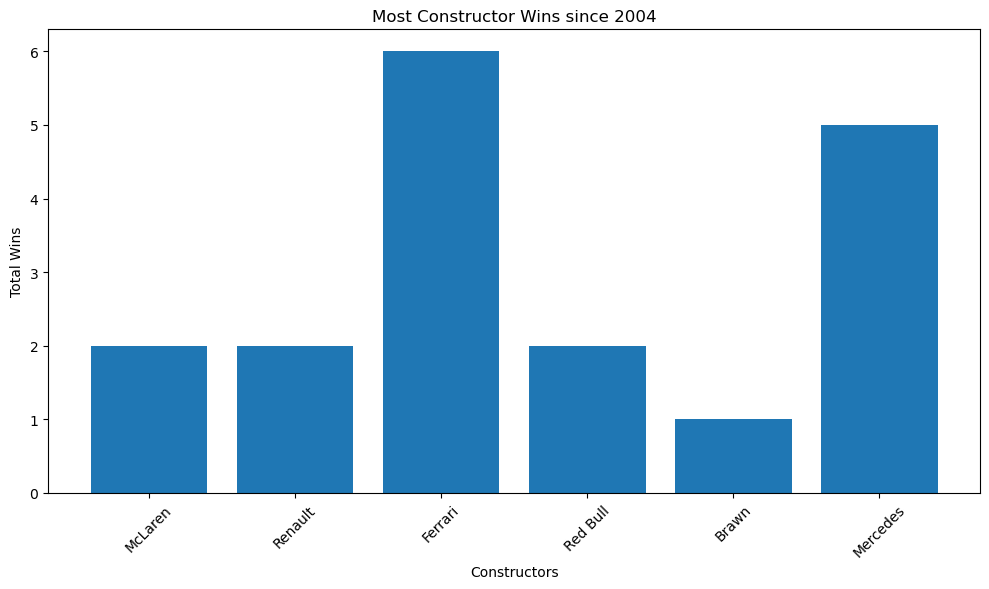

In [13]:
# Create a bar chart for top constructors per year from 2004
plt.figure(figsize=(10, 6))
plt.bar(win_counts['constructor_name'], win_counts['wins'])
plt.xlabel('Constructors')
plt.ylabel('Total Wins')
plt.title('Most Constructor Wins since 2004')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the chart
plt.show()

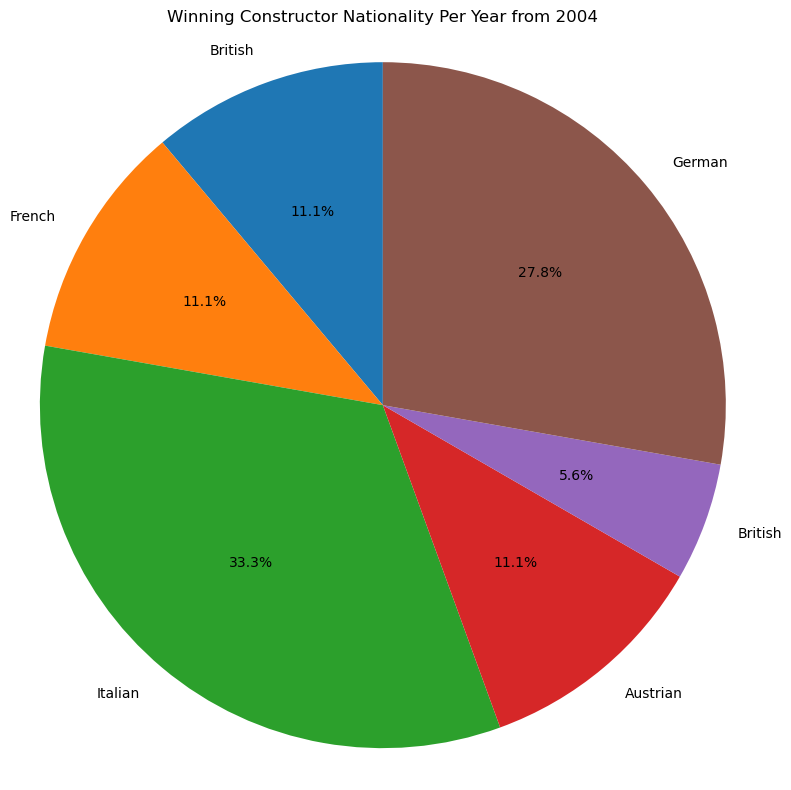

In [14]:
# Create a pie chart for top constructors per year based on nationality
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(win_counts['wins'], labels=win_counts['nationality'], autopct='%1.1f%%', startangle=90)

ax.set_title('Winning Constructor Nationality Per Year from 2004')

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()
plt.show()

In [ ]:
#based on the data, the top 3 most successful constructors are Ferrari, Redbull and Mercedes. Ferarri has been the most successful constructor for f1 in the last 20 years. There can be many factors: such as investment of resources, technical innovation and talent recruitment. Italian made cars serve as a blueprint for success for team managers starting a team in F1. 